## Car price prediction
questions:
- is the dealer offering fair value for my trade-in?
- did i put fair value on my car?

In [23]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# load data
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath) # I don't know why the always instruct to use 'header none' when the data has headers and we use them later

## Linear regression
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$
 Y: Response \ Variable\\\\\\
 X: Predictor \ Variables
$$

 <b>Linear Function</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

### Linear regression modules
from scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# create linear regression object
lm = LinearRegression()
lm

LinearRegression()

Can highway-mpg help predict car price?

In [27]:
# highway-mpg is predictor variable and price is target/response variable
X = df[['highway-mpg']]
Y = df['price']

In [28]:
# fit the linear model
lm.fit(X,Y)

LinearRegression()

In [29]:
# output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

note that, in scikit-learn, attributes computed or set during the fitting process (`.intercept_` & `.coef_`) are indicated by a trailing underscore.

In [30]:
# value of the intercept(a)
lm.intercept_

38423.3058581574

In [31]:
# value of the slope(b)
lm.coef_

array([-821.73337832])

### Linear model?
structure:

$$
Yhat = a + b  X
$$

We get:
Price = 38423 - 821.73 x highway-mpg

In [32]:
# create a linear regression object lm1
lm1 = LinearRegression()

Why is the predictor variable double bracketed and the response variable single bracketed?
e.g.
X = df[['predictor]]
Y = df['response']


- By using double brackets, [['predictor']], a DataFrame is created. This ensures that X is a DataFrame, even if it contains only one column.
- In many machine learning libraries, including scikit-learn, the input to the model should be a 2D array or DataFrame when fitting the model. Using double brackets ensures that X has the correct 2-dimensional shape (i.e., rows and columns).
- X needs to be a 2D structure because it could potentially contain multiple predictor variables (features). Even with a single feature, using double brackets keeps the shape consistent as a 2D DataFrame (n_samples, n_features).

- By using single brackets, ['response'], a Series is created. This ensures that Y is a 1D array-like structure.
- The target variable Y is typically expected to be a 1-dimensional array or Series when fitting the model.
- Y is a 1D structure since it contains only one column of target values.


In [33]:
# engine-size is predictor variable and price is target/response variable
X = df[['engine-size']]
Y = df['price']
# train the model using engine-size as the independent variable and price as the dependent variable
lm1.fit(X,Y)

LinearRegression()

In [34]:
#find the slope
lm1.coef_

array([166.86001569])

In [35]:
#find the intercept
lm1.intercept_

-7963.338906281042

Equation of the predicted line:
Yhat = -7963.34 + 166.86*X

or

Price = -7963.34 + 166.86*df['engine-size']

## Multiple linear regression
predict car price using more than one variable

Illustration using four predictor variables:
$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [36]:
# develop a model using multiple predictors
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [37]:
# fir the model
lm.fit(Z, df['price'])

LinearRegression()

In [38]:
# find the intercept(a)
lm.intercept_

-15806.62462632922

In [39]:
# value of the coefficients(b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

linear function produced:
<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

In [40]:
# develop a model with 'normalized-losses' and 'highway-mpg' as the predictor variables
normLoss_mpg = df[['normalized-losses', 'highway-mpg']]
lm2 = LinearRegression()
lm2.fit(normLoss_mpg, df['price'])

LinearRegression()

In [41]:
#find the coefficients
lm2.coef_

array([   1.49789586, -820.45434016])

In [42]:
# find the intercept
lm2.intercept_

38201.31327245728

## Model evaluation using visualization 

In [43]:
#import visualization package seaborn
import seaborn as sns
#to plot in jupyter notebook
%matplotlib inline 

### Regression plot

(0.0, 48151.80965043718)

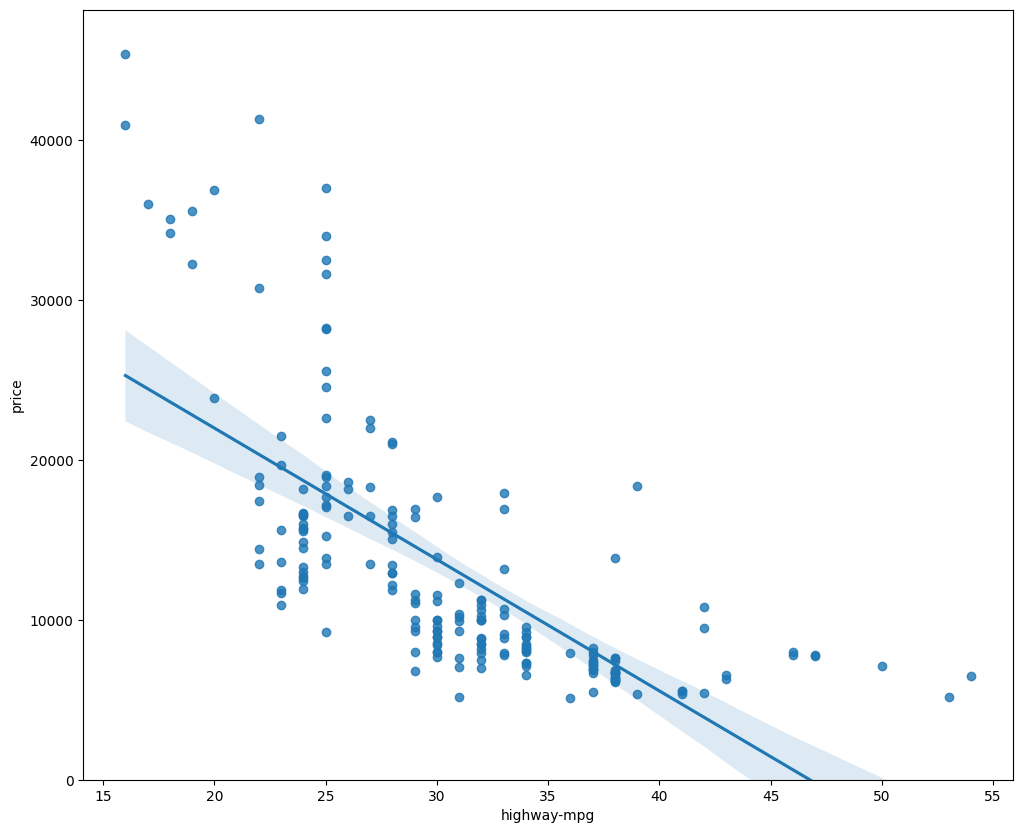

In [44]:
# visualize highway-mpg as potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

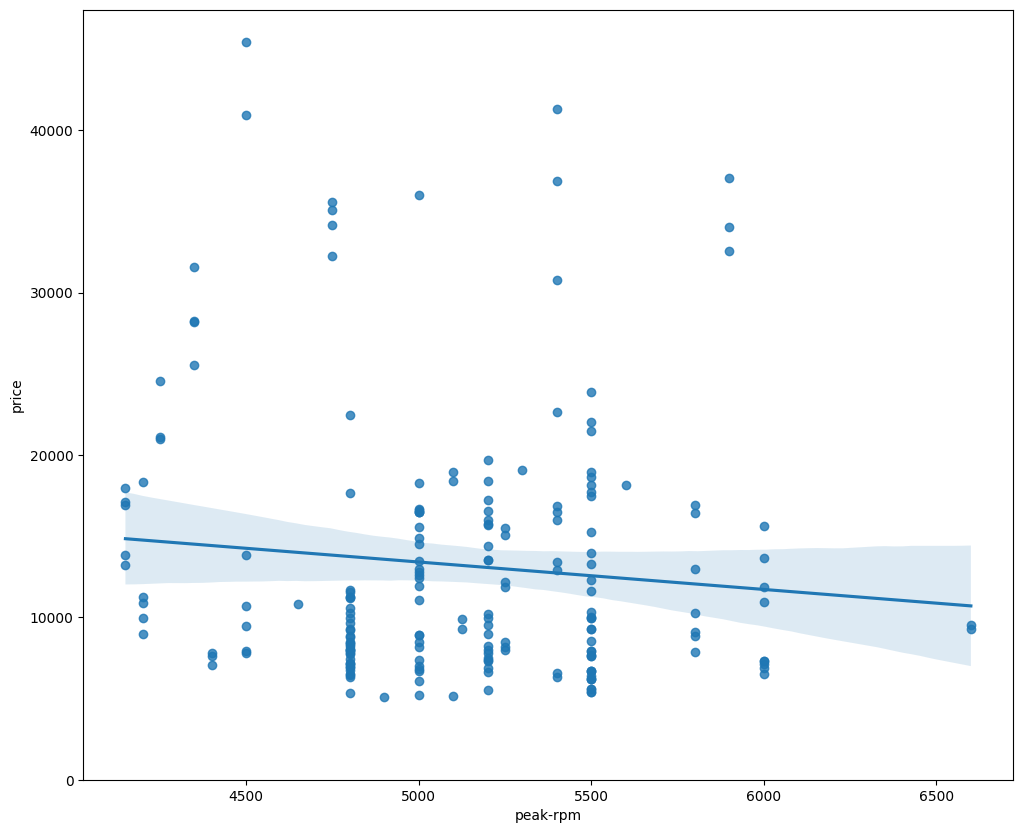

In [45]:
# compare the regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [46]:
# check the correlation between 'peak-rpm' and 'price'
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [47]:
# check the correlation between 'highway-mpg' and 'price'
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


### Residual plot
To visualize the variance of the data

<b>Residual (e)</b> = the diff between the observed value (y) and the predicted value (Yhat). The distance from the data point to the fitted regression line. 

<b>Residual plot<b/>> - shows residuals on the y-axis and the independent variable on the x-axis.

What to look for in a residual plot: constant variance (randomly spread residuals) this indicates a linear model is appropriate for the data. 

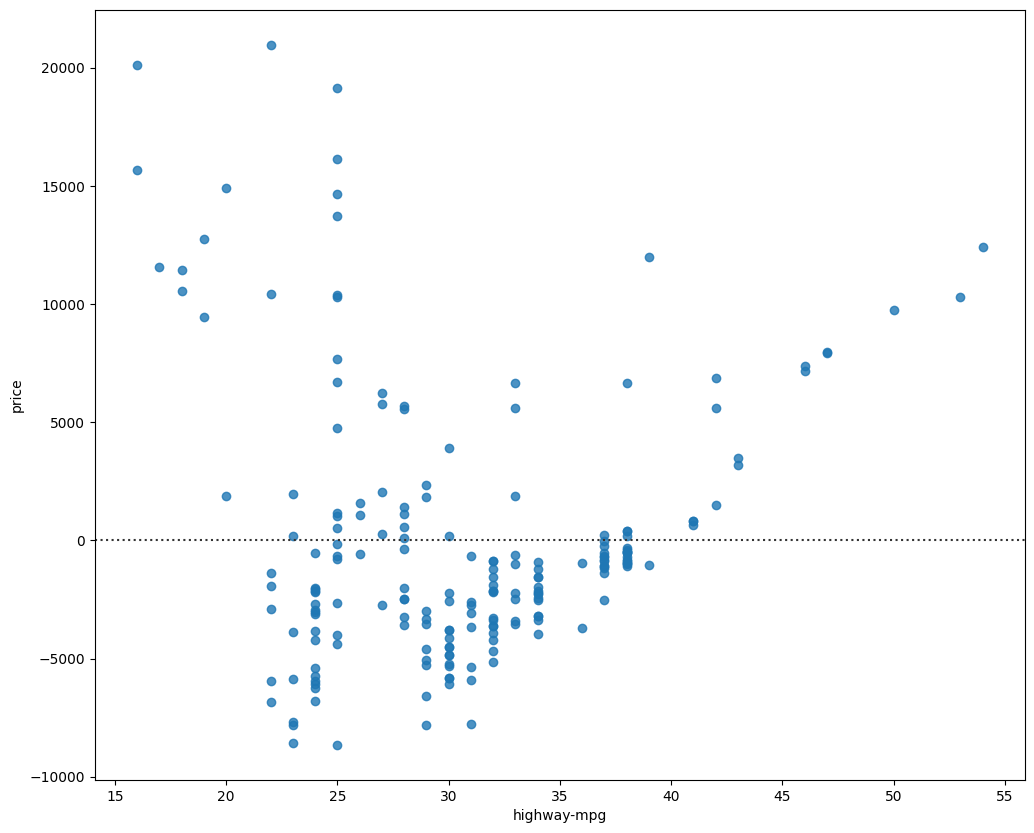

In [48]:
# residual plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

Residuals are not randomly spread, may need to use a non-linear model

## Multiple linear regression visualization

The distribution plot - the distribution fo the fitted values that result from the model and compare to the distribution of the actual values

In [22]:
# from above Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# lm is also defined above
# predicted price
Y_hat = lm.predict(Z)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- curb-weight
- engine-size
- horsepower
